<a href="https://colab.research.google.com/github/shahbaaj25/CODSOFT/blob/main/MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
train_df = pd.read_csv("train_data.txt", sep=':::', header=None, engine='python')


In [3]:
train_df.columns = ['Id','Title','Genre','Description']


In [4]:
train_df.head()

Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [5]:
test_df = pd.read_csv("test_data.txt", sep=':::', header=None, engine='python')



In [6]:
test_df.columns = ['Id','Title','Description']

In [7]:
test_df.head()

Id                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [8]:
print("shape",train_df.shape)

shape (54214, 4)


In [9]:
print("shape",test_df.shape)

shape (54200, 3)


In [10]:
train_df.isnull().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [11]:
test_df.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [12]:
train_df.duplicated().sum()

0

In [13]:
test_df.duplicated().sum()

0

In [14]:
categories = train_df.Genre.unique()
print(len(categories))
categories

27


array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [15]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None


In [16]:
print(train_df.describe())


                 Id
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000


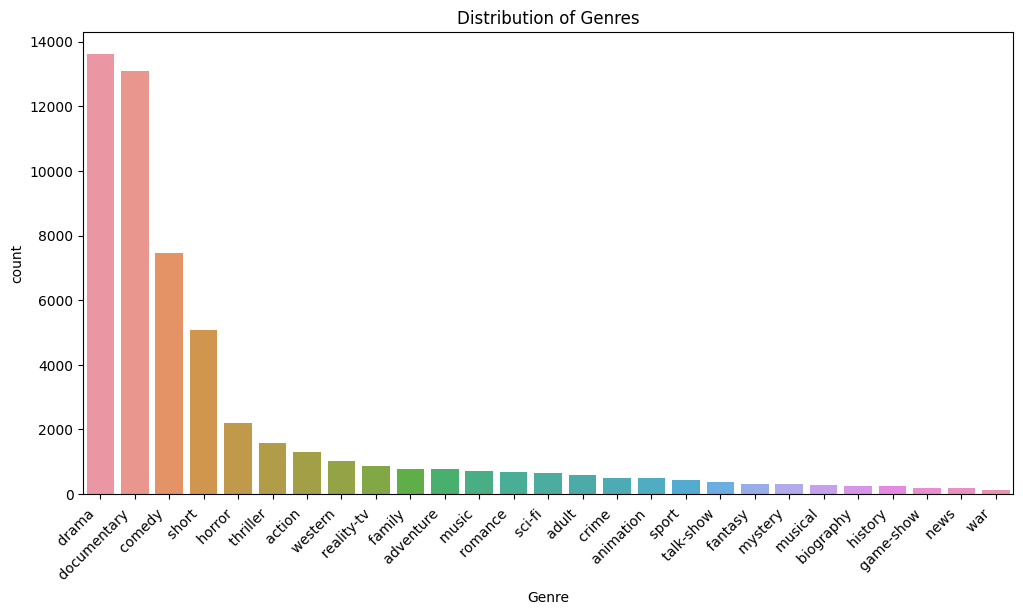

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=train_df, order=train_df['Genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

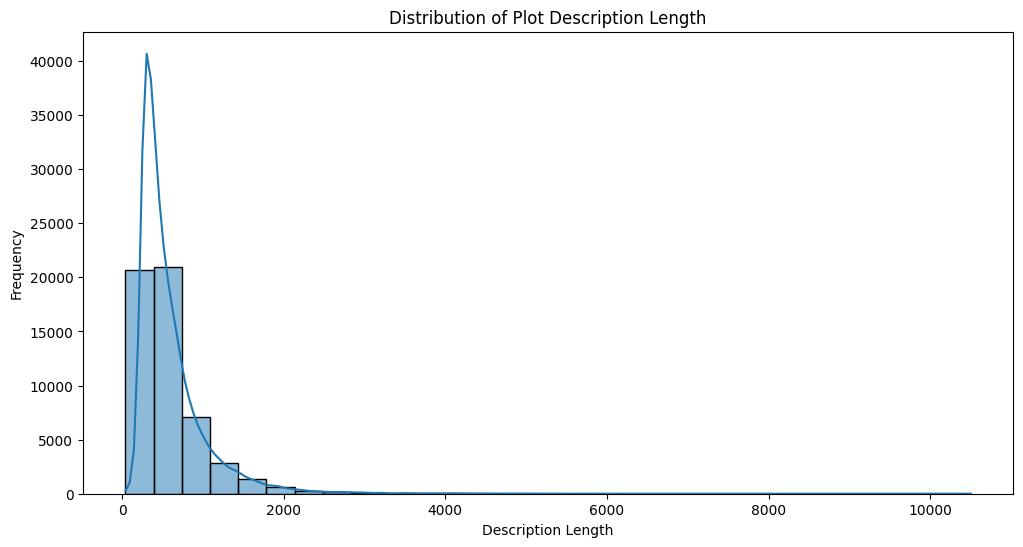

In [18]:
train_df['Description_Length'] = train_df['Description'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(train_df['Description_Length'], bins=30, kde=True)
plt.title('Distribution of Plot Description Length')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

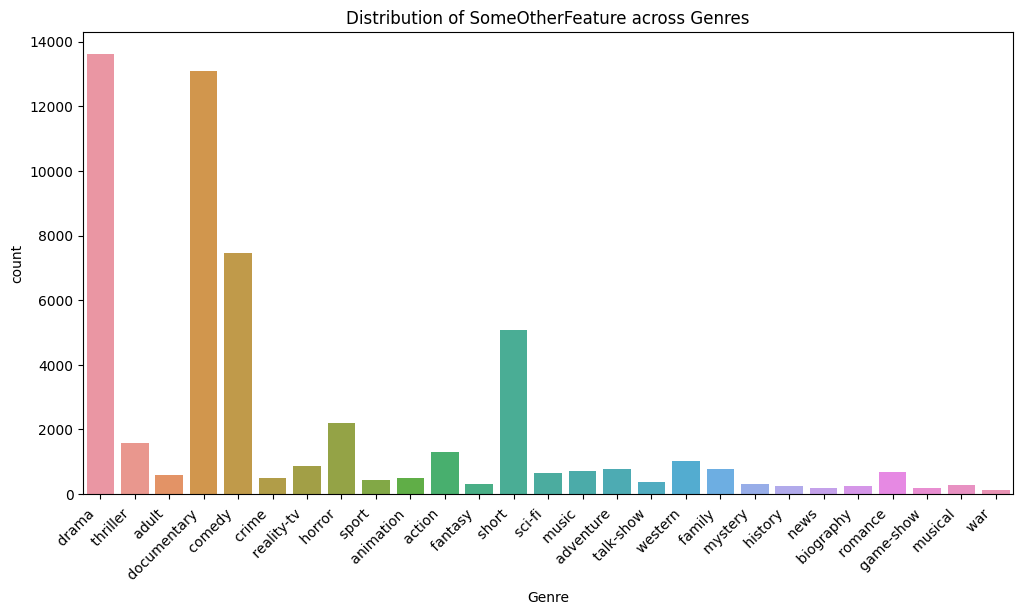

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=train_df)
plt.title('Distribution of SomeOtherFeature across Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-20-00d558000ad9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


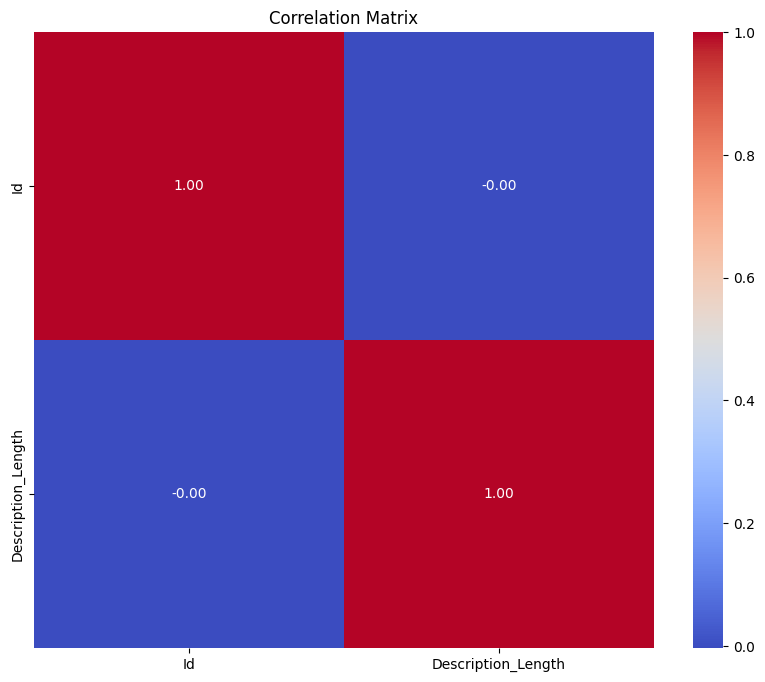

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [21]:

import nltk

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Download the wordnet resource
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download the necessary resources
nltk.download('stopwords')
nltk.download('punkt')

# Set of English stopwords
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)

    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)

    # Tokenize and convert to list
    tokens = word_tokenize(text)

    # Lemmatize each token
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stopwords
    text = [word for word in text if word not in stopword]

    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
train_df["Despcription_clean"] =  train_df["Description"].apply(preprocessing)

In [26]:
train_df.head()

Id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  Description_Length  \
0   Listening in to a conversation between his do...                 546   
1   A brother and sister with a past incestuous r...                 184   
2   As the bus empties the students for their fie...                 650   
3   To help their unemployed father make ends mee...                1082   
4   The film's title refers not only to the un-re...                 625   

                                  Despcription_clean  
0  listening conversation doctor parent 10yearold...  
1  brother sister past incestuous relationship cu...  
2  bus empty student field trip museum natural hi...  
3  help unemployed father make end meet edith twi...  
4  film title refers unrecovered body ground zero...

In [27]:
train_df["Genre"].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

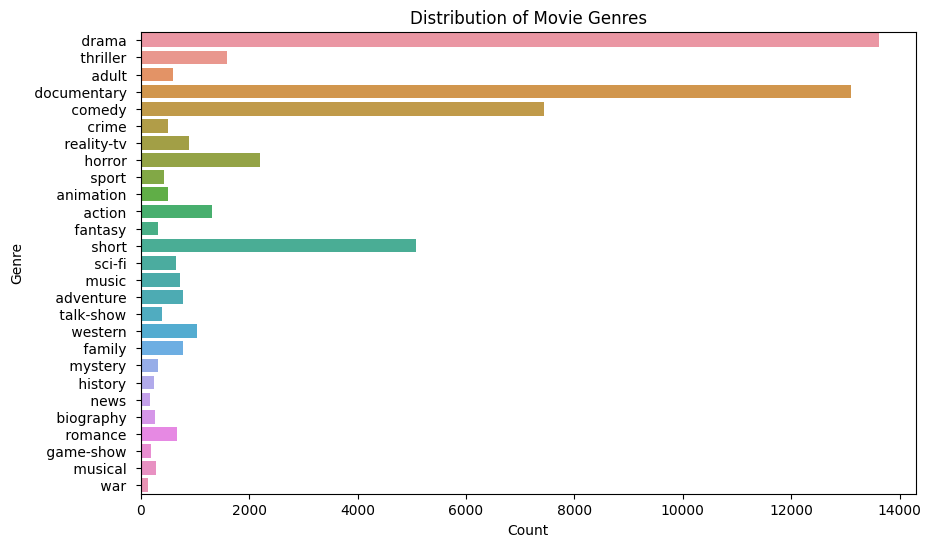

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', data=train_df)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

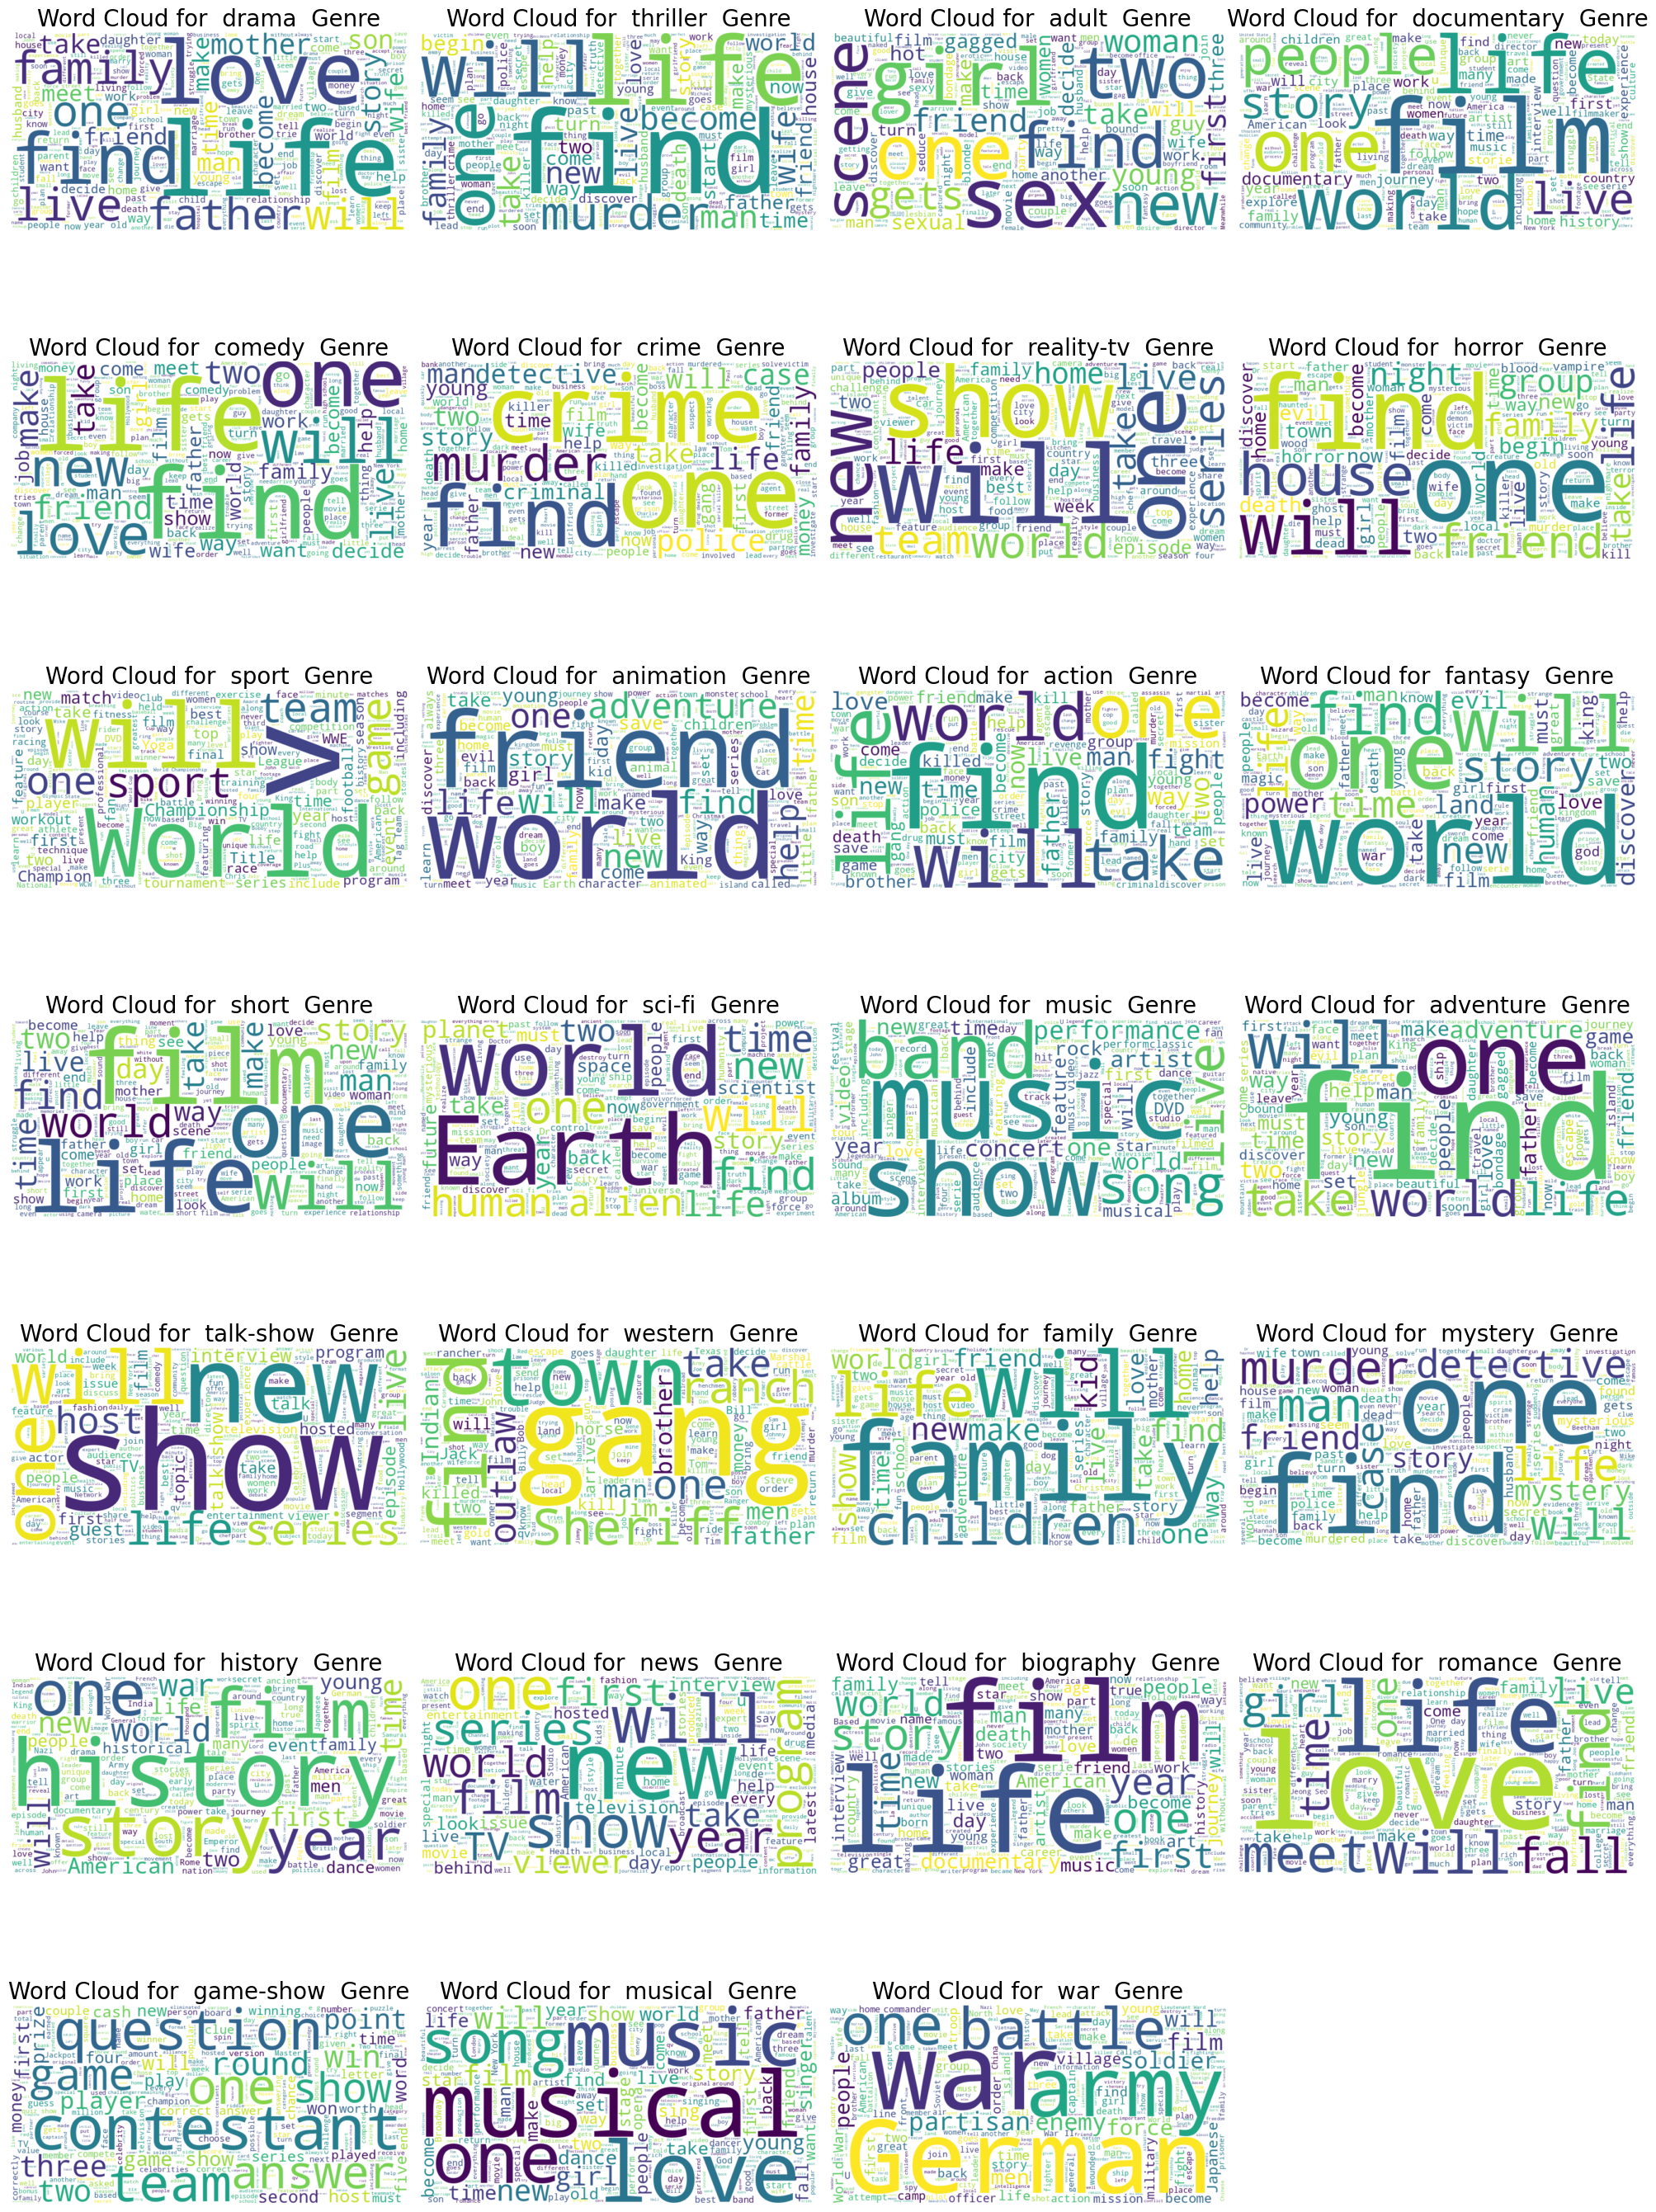

In [29]:
from wordcloud import WordCloud

# Create a list of unique genres from the dataset
genres = train_df['Genre'].unique()

# Set the figure size outside the loop
plt.figure(figsize=(20, 40))

# Iterate over each genre
for i, genre in enumerate(genres, 1):
    plt.subplot(10, 4, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(train_df[train_df["Genre"] == genre]['Description'])
    wordcloud = WordCloud(max_words=300, width=800, height=400, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre', fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [30]:
data = train_df.drop(["Title","Id"] , axis = 1) # will drop column
data.head()

Genre                                        Description  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

   Description_Length                                 Despcription_clean  
0                 546  listening conversation doctor parent 10yearold...  
1                 184  brother sister past incestuous relationship cu...  
2                 650  bus empty student field trip museum natural hi...  
3                1082  help unemployed father make end meet edith twi...  
4                 625  film title refers unrecovered body ground zero...

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

genre_names= list(label_encoder.classes_)
genre_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [32]:
data.head()

Genre                                        Description  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

   Description_Length                                 Despcription_clean  \
0                 546  listening conversation doctor parent 10yearold...   
1                 184  brother sister past incestuous relationship cu...   
2                 650  bus empty student field trip museum natural hi...   
3                1082  help unemployed father make end meet edith twi...   
4                 625  film title refers unrecovered body ground zero...   

   Genre_encoded  
0              8  
1             24  
2              1  
3              8  
4              8

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.3)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)


In [36]:
X = tfidf_vectorizer.fit_transform(data['Despcription_clean'])
y = data['Genre']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming 'data' contains your DataFrame with 'Description' and 'Genre_encoded' columns
X = data['Description']
y = data['Genre_encoded']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TfidfVectorizer to convert text data to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train_tfidf, y_train)

# Evaluate the model
print("Model Score on Training data:", model.score(x_train_tfidf, y_train))
print("Model Score on Test data:", model.score(x_test_tfidf, y_test))

y_pred = model.predict(x_test_tfidf)
print(classification_report(y_pred, y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score on Training data: 0.6607179912844988
Model Score on Test data: 0.5896892004057918
              precision    recall  f1-score   support

           0       0.27      0.53      0.36       135
           1       0.25      0.80      0.38        35
           2       0.13      0.37      0.19        49
           3       0.07      0.58      0.12        12
           4       0.00      0.00      0.00         0
           5       0.58      0.55      0.56      1533
           6       0.01      0.17      0.02         6
           7       0.86      0.67      0.75      3386
           8       0.79      0.54      0.64      3911
           9       0.09      0.39      0.14        33
          10       0.00      0.00      0.00         1
          11       0.45      1.00      0.62        18
          12       0.00      0.00      0.00         0
          13       0.58      0.64      0.61       392
          14       0.50      0.61      0.55       118
          15       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.svm import SVC

# Assuming x_train_tfidf, x_test_tfidf, y_train, and y_test are already defined

# Instantiate the SVM model
model2 = SVC()

# Fit the model to the training data
model2.fit(x_train_tfidf, y_train)

# Evaluate the model
print("Model Score on Training data:", model2.score(x_train_tfidf, y_train))
print("Model Score on Test data:", model2.score(x_test_tfidf, y_test))

y_pred = model2.predict(x_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Score on Training data: 0.8531276659519034
Model Score on Test data: 0.5832334224845522
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.22      0.31       263
           1       0.77      0.21      0.32       112
           2       0.33      0.08      0.13       139
           3       0.50      0.03      0.05       104
           4       0.00      0.00      0.00        61
           5       0.53      0.58      0.55      1443
           6       0.00      0.00      0.00       107
           7       0.65      0.88      0.75      2659
           8       0.52      0.81      0.64      2697
           9       0.60      0.06      0.11       150
          10       0.00      0.00      0.00        74
          11       1.00      0.42      0.60        40
          12       0.00      0.00      0.00        45
          13       0.67      0.57      0.62       431
          14       0.66      0.41      0.51       144
          15      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.naive_bayes import MultinomialNB

# Assuming x_train_tfidf, x_test_tfidf, y_train, and y_test are already defined

# Instantiate the Naive Bayes model
nb_model = MultinomialNB()

# Fit the model to the training data
nb_model.fit(x_train_tfidf, y_train)

# Evaluate the model
print("Naive Bayes Model Score on Training data:", nb_model.score(x_train_tfidf, y_train))
print("Naive Bayes Model Score on Test data:", nb_model.score(x_test_tfidf, y_test))

y_pred_nb = nb_model.predict(x_test_tfidf)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Model Score on Training data: 0.5316686265015794
Naive Bayes Model Score on Test data: 0.5111131605644195
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.05      0.10       263
           1       0.67      0.02      0.03       112
           2       0.38      0.02      0.04       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.51      0.40      0.45      1443
           6       0.00      0.00      0.00       107
           7       0.57      0.89      0.69      2659
           8       0.44      0.83      0.58      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       1.00      0.03      0.05        40
          12       0.00      0.00      0.00        45
          13       0.76      0.26      0.39       431
          14       0.92      0.08  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.ensemble import RandomForestClassifier



rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(x_train_tfidf, y_train)

# Evaluate the model
print("Random Forest Model Score on Training data:", rf_model.score(x_train_tfidf, y_train))
print("Random Forest Model Score on Test data:", rf_model.score(x_test_tfidf, y_test))

y_pred_rf = rf_model.predict(x_test_tfidf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Score on Training data: 0.9995849761361278
Random Forest Model Score on Test data: 0.47818869316609797
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       1.00      0.04      0.07       112
           2       0.62      0.04      0.07       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.50      0.26      0.34      1443
           6       0.00      0.00      0.00       107
           7       0.54      0.89      0.67      2659
           8       0.41      0.83      0.55      2697
           9       1.00      0.03      0.05       150
          10       0.00      0.00      0.00        74
          11       1.00      0.20      0.33        40
          12       0.00      0.00      0.00        45
          13       0.79      0.06      0.11       431
          14       0.76     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
